<span style=float:center><img src='../img/LSASAF_Name_Colour.png' alt='LSA SAF' align='right' width='20%'></img>
<span style=float:center><img src='../img/eumet_logo.png' alt='Eumetsat logo' align='center' width='30%'></img>

## <span style="color:blue">**International Autumn School on Satellite Data Applications (2024)**</span>

**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Antonio Vecoli **[vecoli@meeo.it]** (EUMETSAT/MEEO)

<div class="alert alert-block alert-info"> 
     <h3><b>Data exploration & visualization </b></h3> </div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following requirement:
    
the notebook describes operations on the LSA SAF product downloaded in the notebook [**01_LSAF_download_2024.ipynb**](./01_LSAF_download_2024.ipynb), so one **LST Sky-All** product, like for instance,
    
<span style="color:black">**NETCDF4_LSASAF_MSG_MLST-AS_MSG-Disk_202310091230.nc**</span>    
    
should be already stored in a subfolder of this Jupyter instance.
</div>
<hr>

<span style=float:center><img src='./img/lsasaf_msg_mlst-as_msg-disk.png' alt='CMSAF' align='right' width='25%'></img>
</span> 

# **2 - How to explore and visualize an LSA SAF product**:
## **the example of an LST All-Sky product** 

### **Data used**

|Product name| **Product Description**                    | Area | Spat. Resolution (degrees) |Temp. Coverage|Temp. Resolution | Data Access|
|:--------------------------------------------:|:----:|:---:|:---:|:---:|:---:|:---:|
|<span style="color:blue">**MLST-AS [LSA-005]**</span>|<span style="color:blue">**MSG Land Surface Temperature - All Sky**</span>|<span style="color:blue">**MSG Disk**</span>|**0.05x0.05**|<span style="color:blue">**2020 - NRT**</span>|<span style="color:blue">**30 min**</span> |[**link**](https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MLST-AS/)|

### **Introduction**

This Jupyter Notebook will explain you how to load an LST All-Sky product in the version of a NetCDF file, in order to extract the variables and the attributes that are included in the product. Dedicated sections will then show how to use specific Python libraries to obtain basic or more advanced plot of the selected variable.

### **Outline**

* [**2.1 - Loading/reading an LST All-Sky product**](#reading)
* [**2.2 - Basic Data Visualization**](#basic) 
* [**2.3 - Advanced Data Visualization/1 (Cartopy)**](#advanced)
* [**2.4 - Advanced Data Visualization/2**](#advanced+)    

<hr>

#### **Importing required libraries**

In [2]:
import os
import zipfile

from netCDF4 import Dataset     # read / write NetCDF4 files

import numpy as np  

from datetime import datetime   #handling basic date and time types

import matplotlib.pyplot as plt # plotting library
import cartopy, cartopy.crs as ccrs # produce maps and other geospatial data analyses
import cartopy.feature as cfeature  # common drawing and filtering operations
import cartopy.io.shapereader as shpreader # import shapefiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib 
from matplotlib.offsetbox import AnchoredText                        # adds an anchored text box in the corner
from matplotlib.offsetbox import OffsetImage                         # change the image size (zoom)
from matplotlib.offsetbox import AnnotationBbox                      # creates an annotation using an OffsetBox
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar # draw a horizontal scale bar with a center-aligned label underneath
import matplotlib.font_manager as fm                                 # a module for finding, managing, and using fonts across platforms

<hr>

### <a id="reading"></a>**2.1 - Loading/reading an LST All-Sky product**

A NetCDF file can be easily loaded and explored by using the [**NetCDF4**](https://unidata.github.io/netcdf4-python/) library, that will open the product showing the full set of variables, attributes and metadata elements, each listed with the proper keyword and value.

In [4]:
# open the file using the NetCDF4 library
file = Dataset("data/NETCDF4_LSASAF_MSG_MLST-ASv2_MSG-Disk_202406121030.nc")

file

FileNotFoundError: [Errno 2] No such file or directory: 'data/NETCDF4_LSASAF_MSG_MLST-ASv2_MSG-Disk_202406121030.nc'

Each element of the dataset can be selected with the same syntax. For example if you want to extract the  <span style="color:red">**dimensions**</span> attribute:

In [3]:
file.dimensions

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 3201,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 3201,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1}

In the same way you can access the group of variables contained in the product by extracting the <span style="color:red">**variables**</span> object:

In [4]:
variables = file.variables
variables

{'CMa': <class 'netCDF4._netCDF4.Variable'>
 int16 CMa(time, lat, lon)
     long_name: CMa_
     scale_factor: 1.0
     grid_mapping: crs
     _FillValue: 32767
 unlimited dimensions: time
 current shape = (1, 3201, 3201)
 filling on,
 'MLST-AS': <class 'netCDF4._netCDF4.Variable'>
 int16 MLST-AS(time, lat, lon)
     long_name: LST
     scale_factor: 0.01
     units: Celsius
     grid_mapping: crs
     _FillValue: -8000
 unlimited dimensions: time
 current shape = (1, 3201, 3201)
 filling on,
 'crs': <class 'netCDF4._netCDF4.Variable'>
 |S1 crs()
     grid_mapping_name: latitude_longitude
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6378137.0
     inverse_flattening: 298.257223563
 unlimited dimensions: 
 current shape = ()
 filling off,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     standard_name: latitude
     long_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (3201,)
 filling off,
 'lon': <class 'net

Accessing the <span style="color:red">**variables**</span> object included in the product has made visible the whole set of metadata for each of the variables. The variable of interest can be extracted by selecting its name: 

In [5]:
LST = variables['MLST-AS']
LST

<class 'netCDF4._netCDF4.Variable'>
int16 MLST-AS(time, lat, lon)
    long_name: LST
    scale_factor: 0.01
    units: Celsius
    grid_mapping: crs
    _FillValue: -8000
unlimited dimensions: time
current shape = (1, 3201, 3201)
filling on

From the variable it is possible to extract the raster containing the LST values:

In [6]:
data = LST[0,:,:]

<span style="color:blue">**data**</span> is now a bidimensional array of pixel values with size 3201x3201. that is ready to be plotted.

<hr>

### <a id="basic"></a>**2.2 - Basic Data Visualization**

We will now define the elements that are needed to provide a basic visualization of the data, including:

* size of the map
* proper labels 
* colormap

First of all we will retrieve the details that will be then displayed in the labels. All these elements are included in the attributes of the product that has been open in the previous section, so the contents will be extracted from it:

In [7]:
# get the date

date_str  = file.getncattr('time_coverage_start') #instruction to extract the value of an attribute from the product
date_format = '%Y-%m-%dT%H:%M:%SZ'
date_obj = datetime.strptime(date_str, date_format)
date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC') #time conversion in UTC format

date

'2024-09-16 14:00:00 UTC'

The last element we need before starting to work on the plot is to know where is the **origin** of the data, in term of **latitudes** . If the array of latitudes starts from the lower value, the origin is defined as **lower**, **upper** otherwise.
For this purpose we need to extract the array of latitudes from the product object. If you look into the <span style="color:red">**variables**</span> object, you will find a **lat** variable that is the needed one:

In [8]:
# extract the lats
lats = file.variables['lat'][:]

# print the lats
print(lats)

[ 80.       79.95     79.90001 ... -79.9     -79.95    -80.     ]


So we have an **upper** origin.

The main settings of a plot in Python are then provided using the [**Matplotlib**](https://matplotlib.org/stable/plot_types/index.html) library:

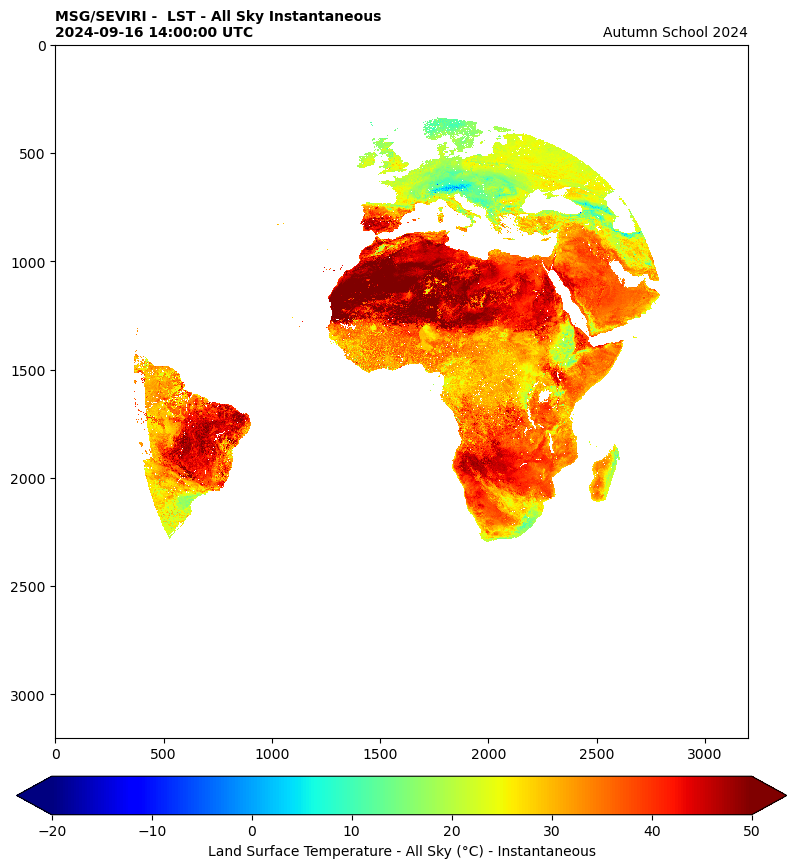

In [9]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# plot the image
plt.imshow(data, vmin=-20, vmax=50, origin='upper', cmap='jet',interpolation = 'None')

# add a colorbar
plt.colorbar(label='Land Surface Temperature - All Sky (°C) - Instantaneous', extend='both', orientation='horizontal',
             pad=0.05, fraction=0.05)

# add a title
plt.title(f'MSG/SEVIRI -  LST - All Sky Instantaneous\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Autumn School 2024', fontsize=10, loc='right')

#-------------------------------------------------------------------------------------------------------------------

# save the image
plt.savefig('OUTPUT/image_LST-AS_1.png')

# show the image
plt.show()

As you can see the basic map includes only elements retrieved from the product without plotting any other feature imported from external sources. But it is possible to improve the map by enriching it with features that provide a more complete context for the data.

<hr>

### <a id="advanced"></a>**2.3 - Advanced Data Visualization/1 (Cartopy)**

Introducing the [**Cartopy**](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html) library will allow you to add features both from internal sources of the library and from external sources, as well as introducing a lat-lon grid, or selecting a specific projection and much more. Here we will show you few of the most used features and then you will have the possibility to dive into the linked documentation and try more features on your own.

#### **2.3.1 General Cartopy settings**

As a first element, Cartopy allows you to decide the extent of the map you want to plot and as a first example we provide the map with for the full disk of SEVIRI which is also the bounding box of the current product.
So first the max and min values of longitude and latitude dimensions must be retrieved. The array of latitude values has been already defined, now only the longitudes are missing:

In [10]:
# extract the lons
lons = file.variables['lon'][:]
print(lons)

[-80.      -79.95    -79.9     ...  79.90001  79.95     80.     ]


Now we can start defining the elements of the map using the Cartopy features:

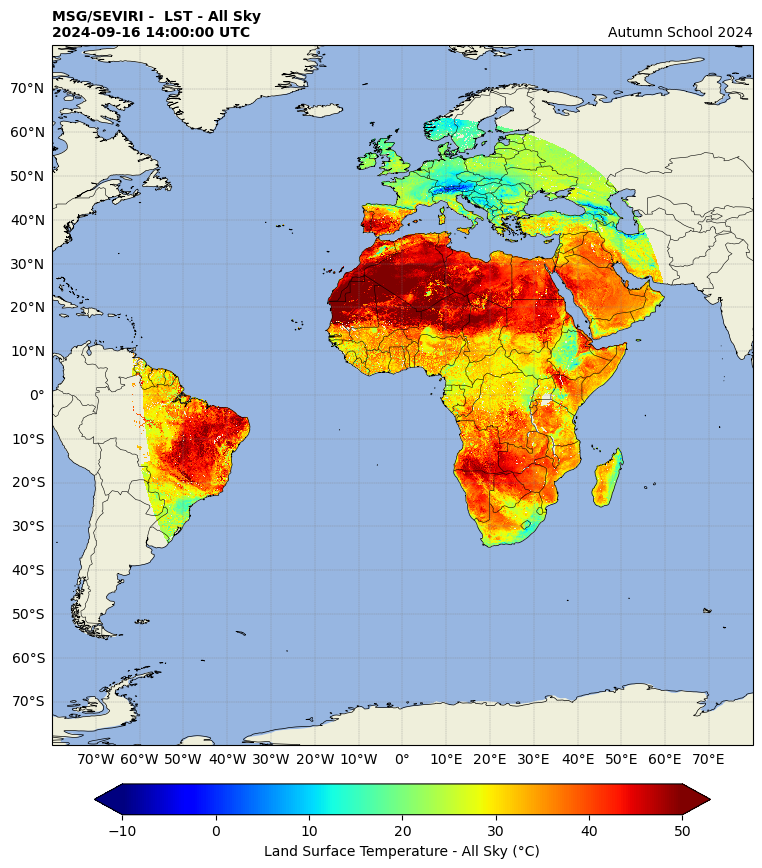

In [11]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# use the PlateCarree projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define the image extent
img_extent = [lons.min(), lons.max(), lats.min(), lats.max()]


# plot the image
img = ax.imshow(data, vmin=-10, vmax=50, origin='upper', extent = img_extent, cmap='jet',interpolation = 'None')


# add some various map elements to the plot
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# add coastlines, borders and gridlines
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.4)
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  color='gray', 
                  alpha=1.0, 
                  linestyle='--', 
                  linewidth=0.25,
                  xlocs=np.arange(-180, 181, 10), 
                  ylocs=np.arange(-90, 91, 10), 
                  draw_labels=True)

gl.top_labels = False
gl.right_labels = False

# add a colorbar
plt.colorbar(img, label='Land Surface Temperature - All Sky (°C)', extend='both', orientation='horizontal',
             pad=0.05, fraction=0.04)

# get the date
date_str  = file.getncattr('time_coverage_start')
date_format = '%Y-%m-%dT%H:%M:%SZ'
date_obj = datetime.strptime(date_str, date_format)
date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

# add a title
plt.title(f'MSG/SEVIRI -  LST - All Sky \n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Autumn School 2024', fontsize=10, loc='right')

# save the image
plt.savefig('OUTPUT/image_LST-AS_2.png')

# show the image
plt.show()

#### **2.3.2 Regional map with shapefile features**

Having the possibility to select the area of visualization for the map means also that you can display the data for a specific subregion of the original spatial coverage.
And when producing a map on a smaller e it can be necessary to add more local borders that are not available in Cartopy. Let's for example focus in the area of Italy.
There are multpiple sources to get administrative borders on a global scale or on a country level.

The [https://www.naturalearthdata.com](https://www.naturalearthdata.com) provides a wide set of features with shapefile format, categorized in **Cultural**,**Phyisical** and **Raster** domains.

For our purpose we will instead get national and administrative borders for a specific country from the [**GADM website**](https://gadm.org/index.html) where you can find them down to the local level for each country and available in different formats, including shapefile.

Let's then take the link to the full shapefile package for GItaly and define the destination folder where the package will be stored.

In [12]:
#link = 'https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_ITA_shp.zip'
#destination = 'auxfiles/'

It is now possible to build the instruction that will download the data:

In [13]:
#instruction= 'wget -P '+ destination + ' '+ link 

In [14]:
#os.system(instruction)

We have then to unzip the downloaded file:

In [15]:
#with zipfile.ZipFile('auxfiles/gadm41_ITA_shp.zip', 'r') as zip_ref:
#    zip_ref.extractall(path = 'auxfiles/gadm41_ITA/')

Once the shapefiles are available, they can be included in the creation of the map with Cartopy. 
The following operations will be implemented to obtain the final map:

* general Cartopy setting of the map
* defining the extent of the map
* adding Cartopy features 
* adding the selected shapefile 
* setting colorbar and labels

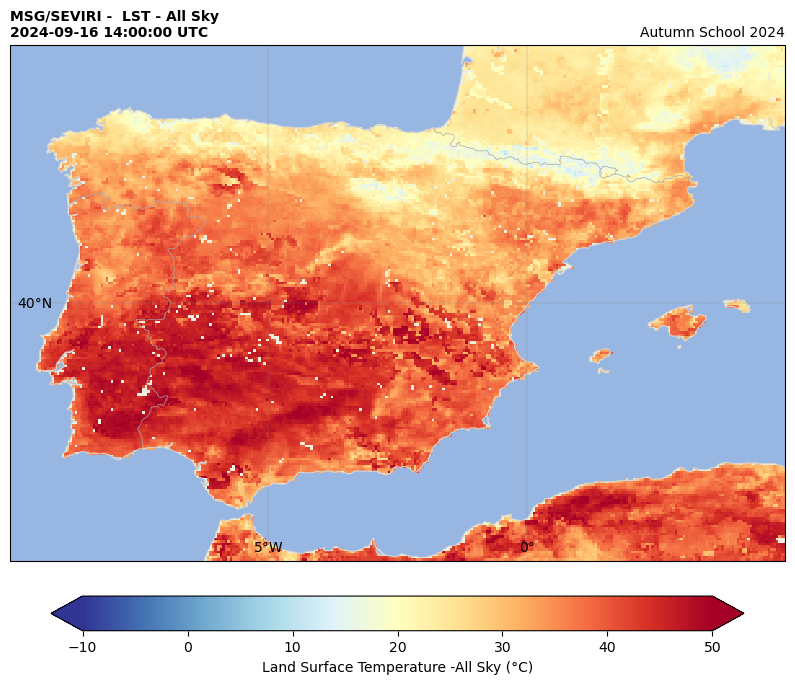

In [16]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# use the PlateCarree projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

#extent = [6,35, 20,48] #[lonmin,latmin, lonmax,latmax]
extent = [-10,35, 5,45] #[lonmin,latmin, lonmax,latmax]

# latitude lower and upper index
latli = np.argmin( np.abs( lats - extent[1] ) )
latui = np.argmin( np.abs( lats - extent[3] ) )

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - extent[0] ) )
lonui = np.argmin( np.abs( lons - extent[2] ) )

# extract the data
data = file.variables['MLST-AS'][ 0 , latui:latli , lonli:lonui ]

# define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# plot the image
img = ax.imshow(data, vmin=-10, vmax=50, origin='upper', extent=img_extent, cmap='RdYlBu_r',interpolation='None')

# add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='lightgrey', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgrey', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 181, 5), ylocs=np.arange(-90, 91, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xpadding = -5
gl.ypadding = -5


# add some elements to the plot
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# add a colorbar

# add a shapefile
shapefile = list(shpreader.Reader('auxfiles/gadm41_ITA/gadm41_ITA_1.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
plt.colorbar(img, label='Land Surface Temperature -All Sky (°C)', extend='both', orientation='horizontal', pad=0.045, fraction=0.045)

# add a title
plt.title(f'MSG/SEVIRI -  LST - All Sky \n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Autumn School 2024', fontsize=10, loc='right')

#-------------------------------------------------------------------------------------------------------------------

# save the image
plt.savefig('OUTPUT/image_LST-AS_3.png')

# show the image
plt.show()

<hr>

### <a id="advanced+"></a>**2.4 - Advanced Data Visualization/2**

The maps produced in Python can be further enhanced by choosing a more appropriate colormap or adding images and details from external sources. In this section in particular, you will see:

* how to create customized colormaps
* how to include additional feature or add external images into a map

When working in Python to produce maps, Matplotlib is one of the reference packages for plots and it provides a set of ready-to-use colormaps [[**link**]](https://matplotlib.org/stable/gallery/color/colormap_reference.html). But in many cases the available colormaps can not be suitable for the data you have to visualize and a good option is the possibility to create customized colormaps, with colors directly selected by the user.

As an example, by taking from this website [https://imagecolorpicker.com/](https://imagecolorpicker.com/) you can pick the colors you want to use with their specificx **hexadecimal** codes and here follows how you can create your colormap: 

In [17]:
colors = ["#010044", "#001856", "#0f2187", "#0f30b1", "#0d62bc", "#2183e8",
          "#4ba7fc", "#94d3ff", "#e5fdff", "#fce875", "#ffbd33", "#ff9d02", "#ff5d00",
          "#e72000", "#d20e02", "#b7270c", "#971515", "#860000", "#6b014b", "#500059"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#500059')
cmap.set_under('#010044')
vmin = -10
vmax = 50

In addition, with the following code you will be able to add a logo, or another image, to the map, setting its size and position:

In [18]:
my_logo = plt.imread('../img/LSASAF_Name_Colour.png')
imagebox = OffsetImage(my_logo, zoom = 0.02)
ab1 = AnnotationBbox(imagebox, (0.9, 0.05), xycoords="axes fraction", frameon = True, zorder=6)


Matplotlib also allows to insert a scale bar in the map,using its [AnchoredSizeBar](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.anchored_artists.AnchoredSizeBar.html) feature: 

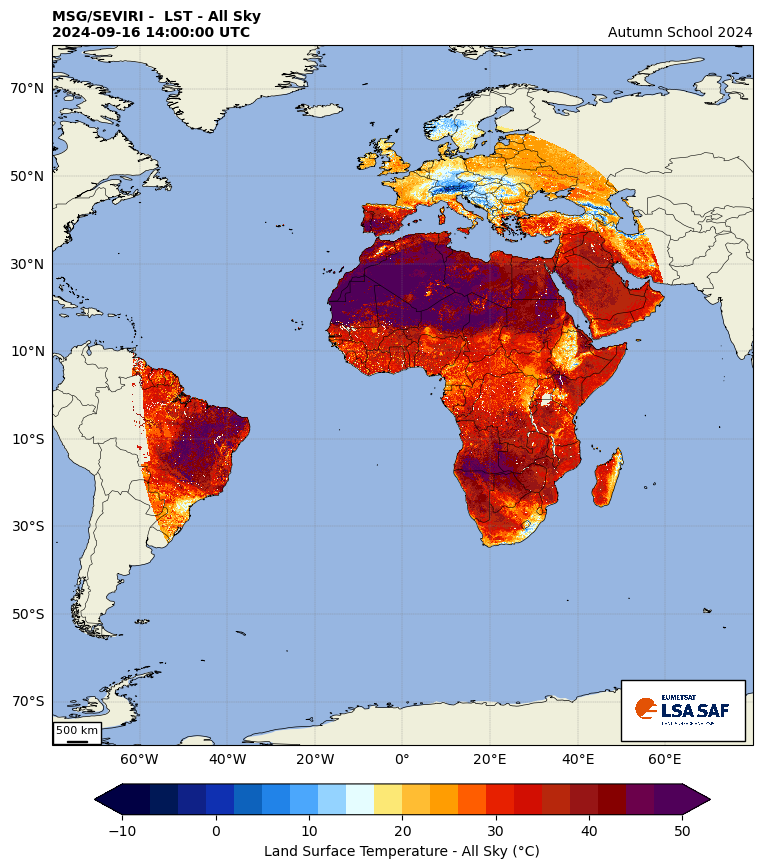

In [19]:
# choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# use the PlateCarree projection in cartopy
ax1 = plt.axes(projection=ccrs.PlateCarree())

# define the image extent
img_extent = [lons.min(), lons.max(), lats.min(), lats.max()]


# plot the image
data = LST[0,:,:]

img = ax1.imshow(data, vmin=-10, vmax=50, origin='upper', extent = img_extent, cmap=cmap,interpolation = 'None')


# add some various map elements to the plot
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

# add coastlines, borders and gridlines
ax1.coastlines(resolution='50m', color='black', linewidth=0.5)
ax1.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.4)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 181, 20), ylocs=np.arange(-90, 91, 20), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER

ax1.add_artist(ab1)

# add scale bar
fontprops = fm.FontProperties(size=8)
distance = 500
scalebar = AnchoredSizeBar(ax1.transData, (distance / 111), str(distance) + ' km', loc='lower left', pad=0.25, color='black',
                           frameon=True, label_top=True, sep=4, size_vertical=0.2, fontproperties=fontprops)
ax1.add_artist(scalebar)

# add a colorbar
plt.colorbar(img, label='Land Surface Temperature - All Sky (°C)', extend='both', orientation='horizontal',
             pad=0.05, fraction=0.04)

# get the date
date_str  = file.getncattr('time_coverage_start')
date_format = '%Y-%m-%dT%H:%M:%SZ'
date_obj = datetime.strptime(date_str, date_format)
date = date_obj.strftime('%Y-%m-%d %H:%M:%S UTC')

# add a title
plt.title(f'MSG/SEVIRI -  LST - All Sky \n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Autumn School 2024', fontsize=10, loc='right')

# save the image
plt.savefig('OUTPUT/image_LST-AS_4.png')

# show the image
plt.show()

<hr>

<span style=float:center><img src='../img/LSASAF_Name_Colour.png' alt='LSA SAF' align='right' width='20%'></img>
<span style=float:center><img src='../img/eumet_logo.png' alt='Eumetsat logo' align='center' width='20%'></img>